# 0/ Steps
- Import Libraries
- Import Data
- Check Descriptive Stats
    - ID
    - Demographics
    - Numerical
    - Categorical
    - Date
- Cleaning 
    - Columns Names
    - Data Type Changes
    - Missing Value Treatment
- EDA
    - Univariate - Plots - Histogram, Box, Bar Plot
    - Bivariate - Plots
- Preprocessing
    - Outlier Treatment
    - Numerical Scaling
    - Categorical Encoding
- Build Model
    - Import Package
    - Create an Instance
    - Build/Fit Model
    - Make Predictions
- Check Performance
    - Calculate Performance Metrics
- Interpretation
    - What is means for the Business Objective

# 1/ Import Libraries

In [1]:
library(tidyverse) # metapackage of all tidyverse packages
library(summarytools)

#library(dplyr)
#library(ggplot2)
#library(DataExplorer)
#library(summarytools)
#library(reshape2) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“no DISPLAY variable so Tk is not available”
system might not have X11 capabilities; in case of errors when using dfSummary(), set st_options(use.x11 = FALSE)


Attaching package: ‘summarytools’


The following object is masked from ‘package:tibble’:

    view




# 2/ Import Data

In [2]:
df = read.csv('/kaggle/input/vehicle-claim-fraud-detection/fraud_oracle.csv')

# 3/ Check Descriptive Stats

In [3]:
head(df)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,⋯,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,⋯,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
2,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,⋯,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
3,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,⋯,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
4,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,⋯,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
5,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,⋯,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
6,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,⋯,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision


In [4]:
summary(df)

    Month            WeekOfMonth     DayOfWeek             Make          
 Length:15420       Min.   :1.000   Length:15420       Length:15420      
 Class :character   1st Qu.:2.000   Class :character   Class :character  
 Mode  :character   Median :3.000   Mode  :character   Mode  :character  
                    Mean   :2.789                                        
                    3rd Qu.:4.000                                        
                    Max.   :5.000                                        
 AccidentArea       DayOfWeekClaimed   MonthClaimed       WeekOfMonthClaimed
 Length:15420       Length:15420       Length:15420       Min.   :1.000     
 Class :character   Class :character   Class :character   1st Qu.:2.000     
 Mode  :character   Mode  :character   Mode  :character   Median :3.000     
                                                          Mean   :2.694     
                                                          3rd Qu.:4.000     
                    

In [5]:
descr(df,
      headings = FALSE, # remove headings
      stats = "common" # most common descriptive statistics
)

,Age,Deductible,DriverRating,FraudFound_P,PolicyNumber,RepNumber,WeekOfMonth,WeekOfMonthClaimed,Year
Mean,39.85571,407.7043,2.487808,5.985733e-02,7710.500,8.483268,2.788586,2.693969,1.994866e+03
Std.Dev,13.49238,43.9510,1.119453,2.372300e-01,4451.515,4.599948,1.287585,1.259115,8.033132e-01
Min,0.00000,300.0000,1.000000,0.000000e+00,1.000,1.000000,1.000000,1.000000,1.994000e+03
Median,38.00000,400.0000,2.000000,0.000000e+00,7710.500,8.000000,3.000000,3.000000,1.995000e+03
Max,80.00000,700.0000,4.000000,1.000000e+00,15420.000,16.000000,5.000000,5.000000,1.996000e+03
N.Valid,15420.00000,15420.0000,15420.000000,1.542000e+04,15420.000,15420.000000,15420.000000,15420.000000,1.542000e+04
Pct.Valid,100.00000,100.0000,100.000000,1.000000e+02,100.000,100.000000,100.000000,100.000000,1.000000e+02


# 4/ Clean Data

In [6]:
sum(is.na(df))

[1] 0

# 5/ EDA

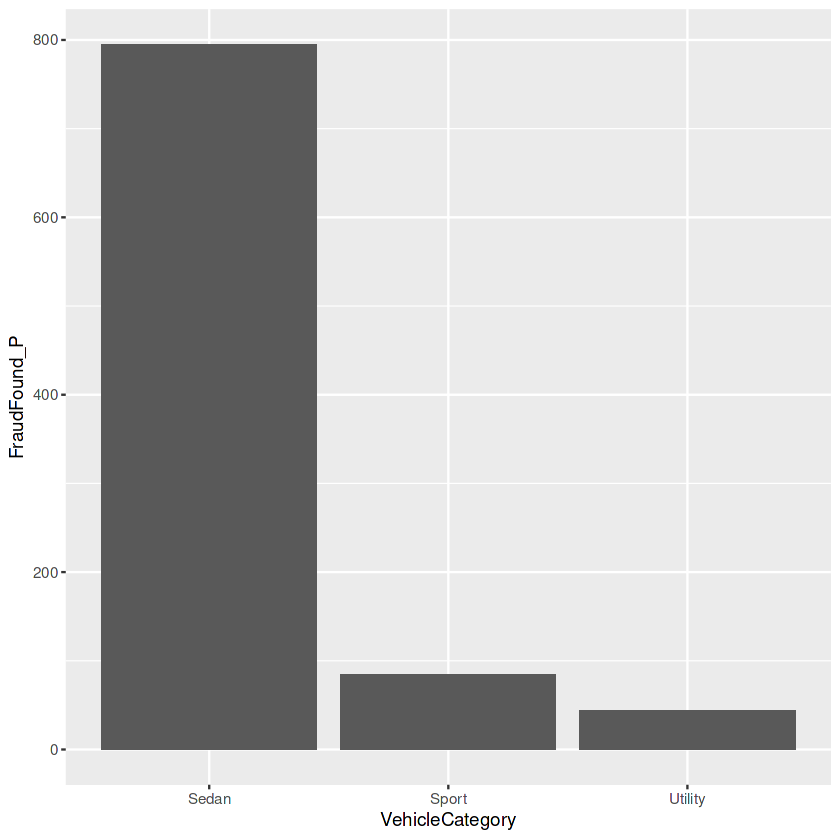

In [7]:
# Bar Plot
ggplot(data = df, aes(x = VehicleCategory, y = FraudFound_P)) +
  geom_bar(stat = "identity")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


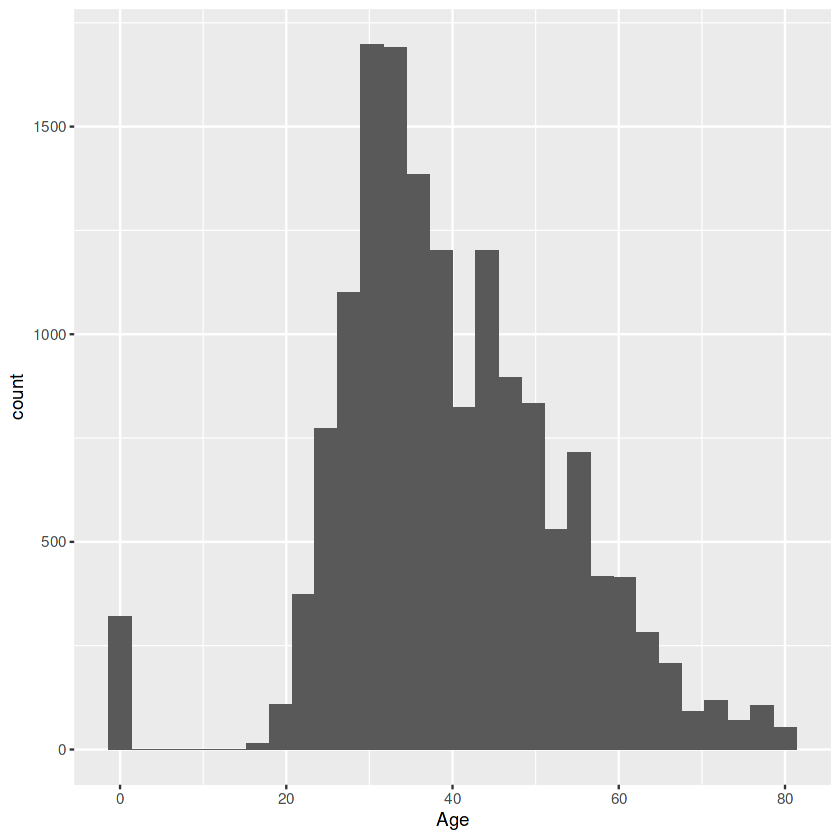

In [8]:
# Numerical - Histogram
ggplot(data = df, aes(x = Age)) +
  geom_histogram()

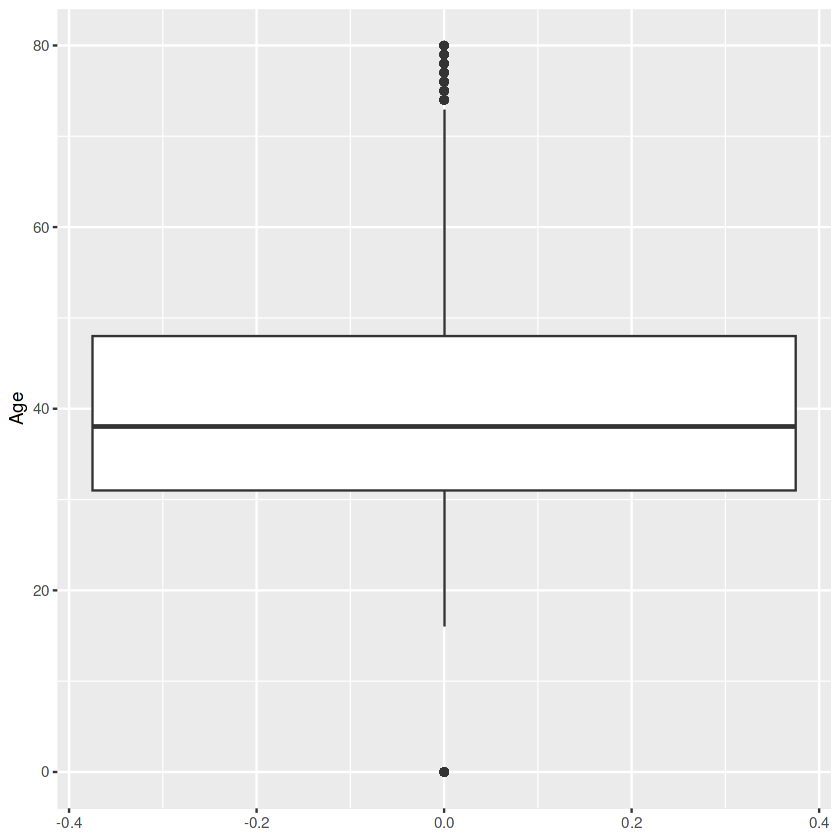

In [9]:
ggplot(data = df, aes(y = Age)) +
  geom_boxplot()

# 6/ Preprocessing - Skip

In [10]:
# Future

# 7/ Model - Logistic Regression
- FraudFound_P (y) - Age, VehicleCategory, Deductible (X)

In [11]:
model <- glm(FraudFound_P ~ Age + VehicleCategory + Deductible + MaritalStatus+ Sex, data = df, family = "binomial")

In [12]:
summary(model)


Call:
glm(formula = FraudFound_P ~ Age + VehicleCategory + Deductible + 
    MaritalStatus + Sex, family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6467  -0.4255  -0.3706  -0.1801   3.0500  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -3.3028231  0.6645749  -4.970 6.70e-07 ***
Age                    -0.0139395  0.0029066  -4.796 1.62e-06 ***
VehicleCategorySport   -1.7294755  0.1161709 -14.887  < 2e-16 ***
VehicleCategoryUtility  0.3568364  0.1655789   2.155  0.03116 *  
Deductible              0.0018442  0.0006698   2.754  0.00590 ** 
MaritalStatusMarried    0.4389333  0.5950697   0.738  0.46075    
MaritalStatusSingle     0.3394514  0.5975347   0.568  0.56998    
MaritalStatusWidow      0.9681343  0.8514177   1.137  0.25550    
SexMale                 0.3152598  0.1085883   2.903  0.00369 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion 

# 8/ Predictions

In [13]:
# Make predictions on the data
df_pred <- df %>%
  mutate(FraudFound_P_pred = predict(model, type = "response"),
         FraudFound_Flag_pred = ifelse(FraudFound_P_pred >= 0.5, 1, 0))

In [14]:
head(df_pred)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,⋯,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P_pred,FraudFound_Flag_pred
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
1,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,⋯,No,No,External,none,1 year,3 to 4,1994,Liability,0.01174730,0
2,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,⋯,Yes,No,External,none,no change,1 vehicle,1994,Collision,0.01608189,0
3,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,⋯,No,No,External,none,no change,1 vehicle,1994,Collision,0.01483851,0
4,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,⋯,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,0.01158387,0
5,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,⋯,No,No,External,none,no change,1 vehicle,1994,Collision,0.01297678,0
6,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,⋯,No,No,External,3 to 5,no change,1 vehicle,1994,Collision,0.01947998,0


In [15]:
write_csv(df_pred, "df_with_predictions.csv")